C:\Users\ADMIN\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9328 - loss: 0.1884 - val_accuracy: 1.0000 - val_loss: 0.0823
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9328 - loss: 0.1719 - val_accuracy: 0.9937 - val_loss: 0.0889
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9344 - loss: 0.1709 - val_accuracy: 0.9937 - val_loss: 0.0871
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9297 - loss: 0.1812 - val_accuracy: 0.9937 - val_loss: 0.0864
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9359 - loss: 0.1726 - val_accuracy: 0.9937 - val_loss: 0.0913
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9312 - loss: 0.1652 - val_accuracy: 0.9937 - val_loss: 0.0924

 
 Early stopping occurred at epoch:  1


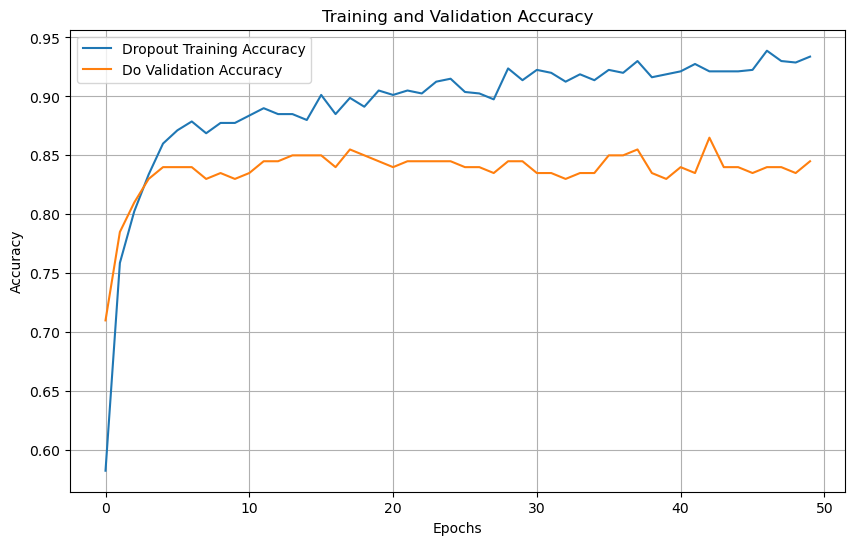

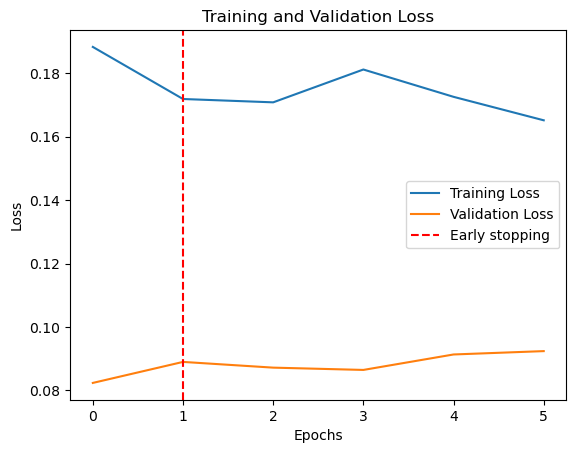

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

def create_dropout_model(dropout_rate=0.2):
    model=Sequential([
        Dense(64,input_shape=(X_train.shape[1],),activation='relu'),
        Dropout(dropout_rate),
        Dense(32,activation='relu'),
        Dropout(dropout_rate),
        Dense(1,activation='sigmoid')
    ])

    return model
dropout_model = create_dropout_model(dropout_rate=0.2)
dropout_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

dropout_history = dropout_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),verbose=0)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history= dropout_model.fit(X_train,y_train,epochs=20,validation_split=0.2,callbacks=[early_stopping])
early_stopping_epoch = np.argmin(history.history['val_loss'])+1
print("\n \n Early stopping occurred at epoch: ",early_stopping_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(dropout_history.history['accuracy'],label='Dropout Training Accuracy',linestyle='-')
plt.plot(dropout_history.history['val_accuracy'],label='Do Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.axvline(x=early_stopping_epoch,color='r',linestyle='--',label='Early stopping')
plt.legend()
plt.show()